In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [19]:
np.random.seed(101) 
tf.set_random_seed(101) 



In [20]:
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 

# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 

n = len(x) # Number of data points 



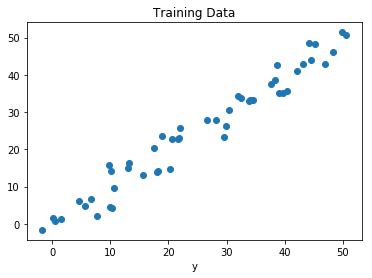

In [21]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 



In [25]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 

W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

In [26]:
learning_rate = 0.01
training_epochs = 1000

In [27]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 

# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 

In [29]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
    
    # Initializing the Variables 
    sess.run(init) 
    
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 

        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 

        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 

    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 



Epoch 50 : cost = 5.2335815 W = 1.0273161 b = -0.33595607
Epoch 100 : cost = 5.2369714 W = 1.0268768 b = -0.31447834
Epoch 150 : cost = 5.24013 W = 1.0264845 b = -0.2952952
Epoch 200 : cost = 5.243056 W = 1.0261341 b = -0.2781603
Epoch 250 : cost = 5.2457495 W = 1.0258211 b = -0.26285738
Epoch 300 : cost = 5.2482195 W = 1.0255415 b = -0.24918896
Epoch 350 : cost = 5.25048 W = 1.0252919 b = -0.2369803
Epoch 400 : cost = 5.2525396 W = 1.0250689 b = -0.22607571
Epoch 450 : cost = 5.2544127 W = 1.0248697 b = -0.21633609
Epoch 500 : cost = 5.256114 W = 1.0246918 b = -0.20763676
Epoch 550 : cost = 5.257653 W = 1.0245329 b = -0.19986679
Epoch 600 : cost = 5.2590427 W = 1.0243909 b = -0.1929265
Epoch 650 : cost = 5.2602997 W = 1.0242641 b = -0.18672739
Epoch 700 : cost = 5.261435 W = 1.024151 b = -0.18119085
Epoch 750 : cost = 5.2624536 W = 1.0240498 b = -0.17624544
Epoch 800 : cost = 5.263374 W = 1.0239595 b = -0.17182831
Epoch 850 : cost = 5.2642 W = 1.0238788 b = -0.1678837
Epoch 900 : cost

In [30]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 



Training cost = 5.2662053 Weight = 1.0236849 bias = -0.15840209 



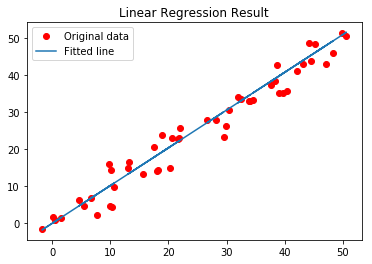

In [31]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 

